In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from datetime import datetime

In [2]:
data = pd.read_pickle('../input/data_clean.pkl')
weather = pd.read_pickle('../input/weather_cleaned.pkl')

In [3]:
data = data.rename(columns={'Area [m2]': 'Area'})
data

,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
0,2023-01-01 00:00:00,ICT,135.0,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.000000,1.000000
1,2023-01-01 01:00:00,ICT,134.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.258819,0.965926
2,2023-01-01 02:00:00,ICT,133.1,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.500000,0.866025
3,2023-01-01 03:00:00,ICT,129.9,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.707107,0.707107
4,2023-01-01 04:00:00,ICT,130.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
87595,2023-12-31 19:00:00,D04,20.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.965926,0.258819
87596,2023-12-31 20:00:00,D04,21.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.866025,0.500000
87597,2023-12-31 21:00:00,D04,18.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.707107,0.707107
87598,2023-12-31 22:00:00,D04,18.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.500000,0.866025


In [4]:
data= data.merge(weather, on='Timestamp', how='left')
data

,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,...,light shower(s),low drifting,mist,partial (covering part of the aerodrome) fog,patches fog,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h
0,2023-01-01 00:00:00,ICT,135.0,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01 01:00:00,ICT,134.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01 02:00:00,ICT,133.1,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01 03:00:00,ICT,129.9,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,2023-01-01 04:00:00,ICT,130.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87595,2023-12-31 19:00:00,D04,20.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87596,2023-12-31 20:00:00,D04,21.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0
87597,2023-12-31 21:00:00,D04,18.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,6.0
87598,2023-12-31 22:00:00,D04,18.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,7.0


In [5]:
data = data.drop(columns=['weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos'], inplace=False)
data['hour'] = data['Timestamp'].dt.hour
data['day'] = data['Timestamp'].dt.day
data['month'] = data['Timestamp'].dt.month
data['weekday'] = data['Timestamp'].dt.weekday
data

,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,T,P0,...,patches fog,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h,hour,day,month,weekday
0,2023-01-01 00:00:00,ICT,135.0,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,6
1,2023-01-01 01:00:00,ICT,134.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,6
2,2023-01-01 02:00:00,ICT,133.1,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,743.3,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1,6
3,2023-01-01 03:00:00,ICT,129.9,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,743.3,...,0.0,0.0,0.0,0.0,-1.0,0.0,3,1,1,6
4,2023-01-01 04:00:00,ICT,130.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,744.1,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87595,2023-12-31 19:00:00,D04,20.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.1,...,0.0,0.0,0.0,0.0,0.0,0.0,19,31,12,6
87596,2023-12-31 20:00:00,D04,21.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.9,...,0.0,0.0,0.0,0.0,0.0,-6.0,20,31,12,6
87597,2023-12-31 21:00:00,D04,18.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-7.0,758.9,...,0.0,0.0,0.0,0.0,-1.0,6.0,21,31,12,6
87598,2023-12-31 22:00:00,D04,18.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-8.0,758.9,...,0.0,0.0,0.0,0.0,-1.0,7.0,22,31,12,6


In [6]:
def preprocess_building_timeseries(df, lags=[1]):
    df = df.copy()
    
    # Generate lag features
    for lag in lags:
        df[f'Usage_lag_{lag}'] = df.groupby('Building_ID')['Usage'].shift(lag)
    
    # Backfill the NaN values created by lagging
    df = df.fillna(method='bfill')

    return df

In [7]:
data = preprocess_building_timeseries(data)
data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19640\3713203130.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,T,P0,...,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h,hour,day,month,weekday,Usage_lag_1
0,2023-01-01 00:00:00,ICT,135.0,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,0,1,1,6,135.0
1,2023-01-01 01:00:00,ICT,134.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,1,1,1,6,135.0
2,2023-01-01 02:00:00,ICT,133.1,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,743.3,...,0.0,0.0,0.0,0.0,0.0,2,1,1,6,134.7
3,2023-01-01 03:00:00,ICT,129.9,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,743.3,...,0.0,0.0,0.0,-1.0,0.0,3,1,1,6,133.1
4,2023-01-01 04:00:00,ICT,130.7,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,744.1,...,0.0,0.0,0.0,0.0,0.0,4,1,1,6,129.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87595,2023-12-31 19:00:00,D04,20.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.1,...,0.0,0.0,0.0,0.0,0.0,19,31,12,6,24.4
87596,2023-12-31 20:00:00,D04,21.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.9,...,0.0,0.0,0.0,0.0,-6.0,20,31,12,6,20.2
87597,2023-12-31 21:00:00,D04,18.2,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-7.0,758.9,...,0.0,0.0,0.0,-1.0,6.0,21,31,12,6,21.1
87598,2023-12-31 22:00:00,D04,18.1,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-8.0,758.9,...,0.0,0.0,0.0,-1.0,7.0,22,31,12,6,18.2


In [8]:
X = data.drop(columns=['Timestamp', 'Building_ID', 'Usage']).copy()
X

,Area,month_sin,month_cos,day_sin,day_cos,T,P0,P,U,Ff,...,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h,hour,day,month,weekday,Usage_lag_1
0,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,746.3,93.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,6,135.0
1,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,746.3,93.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,6,135.0
2,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,743.3,747.0,93.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2,1,1,6,134.7
3,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,743.3,747.0,93.0,6.0,...,0.0,0.0,0.0,-1.0,0.0,3,1,1,6,133.1
4,11413.0,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,744.1,747.8,93.0,6.0,...,0.0,0.0,0.0,0.0,0.0,4,1,1,6,129.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87595,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.1,762.0,86.0,2.0,...,0.0,0.0,0.0,0.0,0.0,19,31,12,6,24.4
87596,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.9,762.8,80.0,2.0,...,0.0,0.0,0.0,0.0,-6.0,20,31,12,6,20.2
87597,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-7.0,758.9,762.8,86.0,1.0,...,0.0,0.0,0.0,-1.0,6.0,21,31,12,6,21.1
87598,4323.6,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-8.0,758.9,762.8,93.0,0.0,...,0.0,0.0,0.0,-1.0,7.0,22,31,12,6,18.2


In [9]:
features = X.columns
print(features, len(features))

Index(['Area', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'T', 'P0', 'P',
       'U', 'Ff', 'Td', 'Drizzle', 'Fog', 'Freezing (supercooled) drizzle',
       'Freezing (supercooled) fog', 'Ground fog', 'Heavy drizzle',
       'Heavy shower(s)', 'Heavy snow', 'Heavy thunderstorm',
       'In the vicinity shower(s)', 'In the vicinity thunderstorm',
       'Light drizzle', 'Light freezing (supercooled) drizzle',
       'Light freezing (supercooled) fog', 'Light rain', 'Light shower(s)',
       'Light snow', 'Light snow grains', 'Light thunderstorm', 'Low drifting',
       'Mist', 'Patches fog', 'Rain', 'Shower(s)', 'Smoke', 'Snow',
       'blowing snow', 'drizzle', 'fog', 'freezing (supercooled) fog',
       'in the vicinity shower(s)', 'in the vicinity thunderstorm',
       'light shower(s)', 'low drifting', 'mist',
       'partial (covering part of the aerodrome) fog', 'patches fog', 'rain',
       'small hail and/or snow pellets', 'snow', 'temp_diff_1h',
       'humid_diff_1h', 'ho

In [10]:
y = data['Usage'].copy()
y

0        135.0
1        134.7
2        133.1
3        129.9
4        130.7
         ...  
87595     20.2
87596     21.1
87597     18.2
87598     18.1
87599     15.8
Name: Usage, Length: 87600, dtype: float64

In [11]:
groups = data['Building_ID'].copy()
groups

0        ICT
1        ICT
2        ICT
3        ICT
4        ICT
        ... 
87595    D04
87596    D04
87597    D04
87598    D04
87599    D04
Name: Building_ID, Length: 87600, dtype: object

In [12]:
building_names = data['Building_ID'].unique().tolist()
building_names

['ICT',
 'U06, U06A, U05B',
 'OBS',
 'U05, U04, U04B, GEO',
 'TEG',
 'LIB',
 'MEK',
 'SOC',
 'S01',
 'D04']

In [13]:
now = datetime.now()
dtime = now.strftime('%H-%M-%S-%d-%m-%Y')
PATH = 'results/xgboost/xgboost_result_' + dtime + '.csv'
print(PATH)

results/xgboost/xgboost_result_14-26-06-02-06-2025.csv


Process building 1/10: ICT
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:35.16772
[1000]	validation_0-rmse:0.08023
[2000]	validation_0-rmse:0.00368
[2842]	validation_0-rmse:0.00368
MSE: 581.09
MAE: 17.46
R² Score: 0.67
MAPE: 9.40%


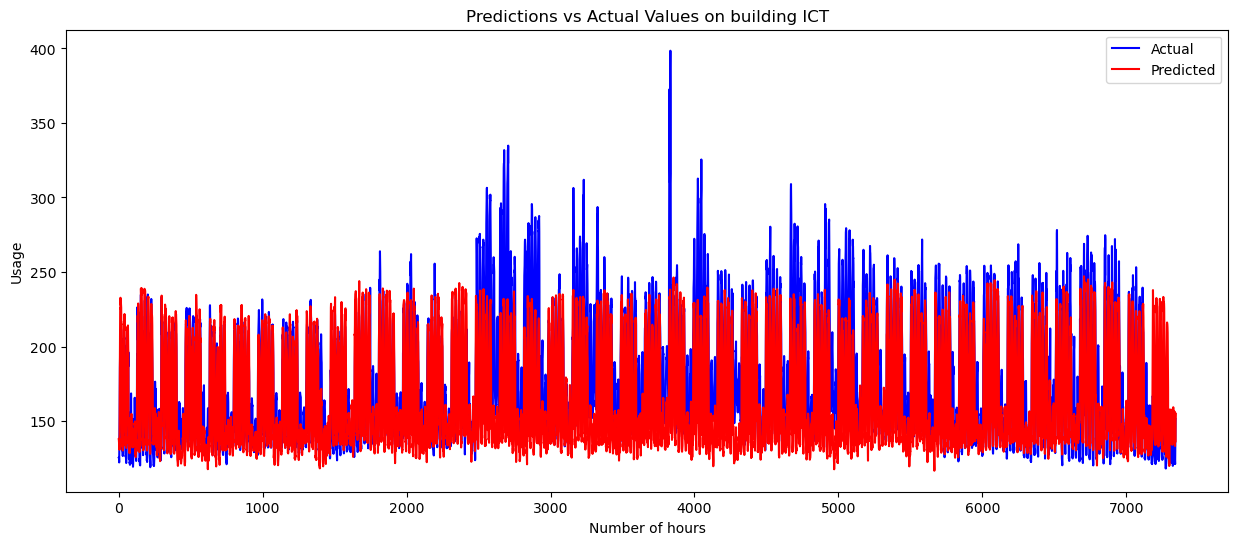

Process building 2/10: U06, U06A, U05B
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:36.42878
[1000]	validation_0-rmse:0.03146
[2000]	validation_0-rmse:0.00354
[2552]	validation_0-rmse:0.00354
MSE: 581.84
MAE: 16.03
R² Score: 0.62
MAPE: 11.02%


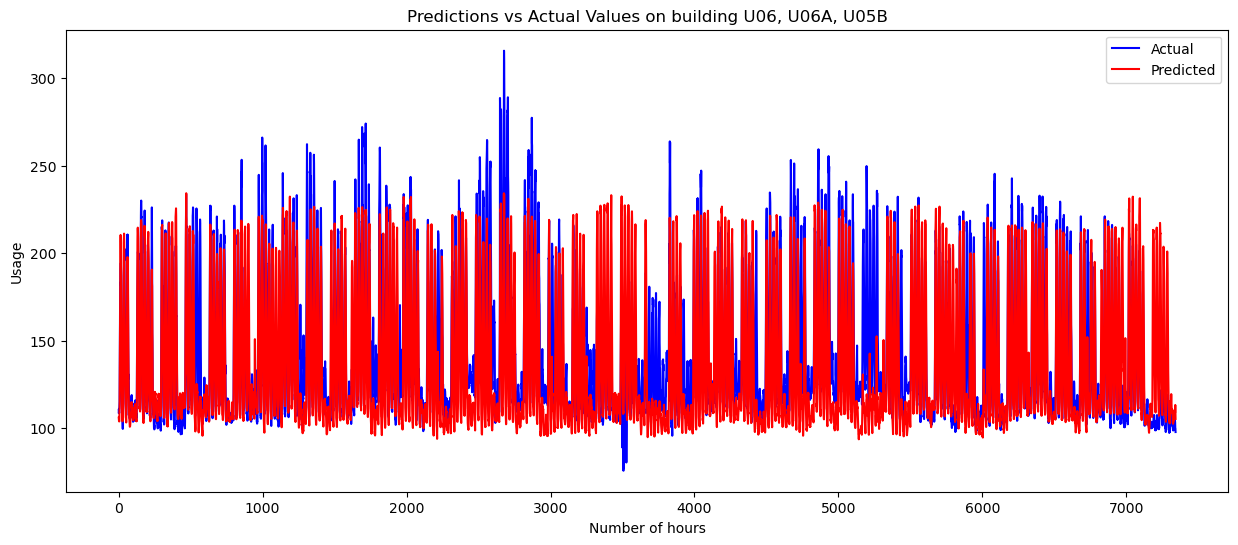

Process building 3/10: OBS
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:0.49935
[1000]	validation_0-rmse:0.00279
[1837]	validation_0-rmse:0.00279
MSE: 19.16
MAE: 3.64
R² Score: -1.87
MAPE: 235.23%


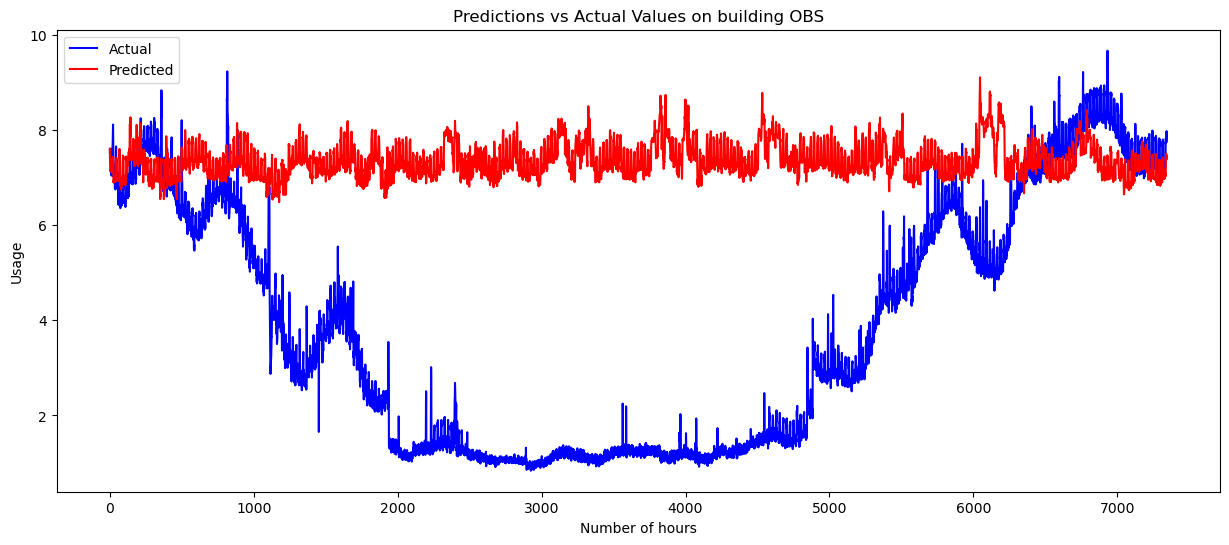

Process building 4/10: U05, U04, U04B, GEO
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:32.27994
[1000]	validation_0-rmse:0.03385
[2000]	validation_0-rmse:0.00381
[2635]	validation_0-rmse:0.00381
MSE: 394.24
MAE: 13.86
R² Score: 0.71
MAPE: 11.97%


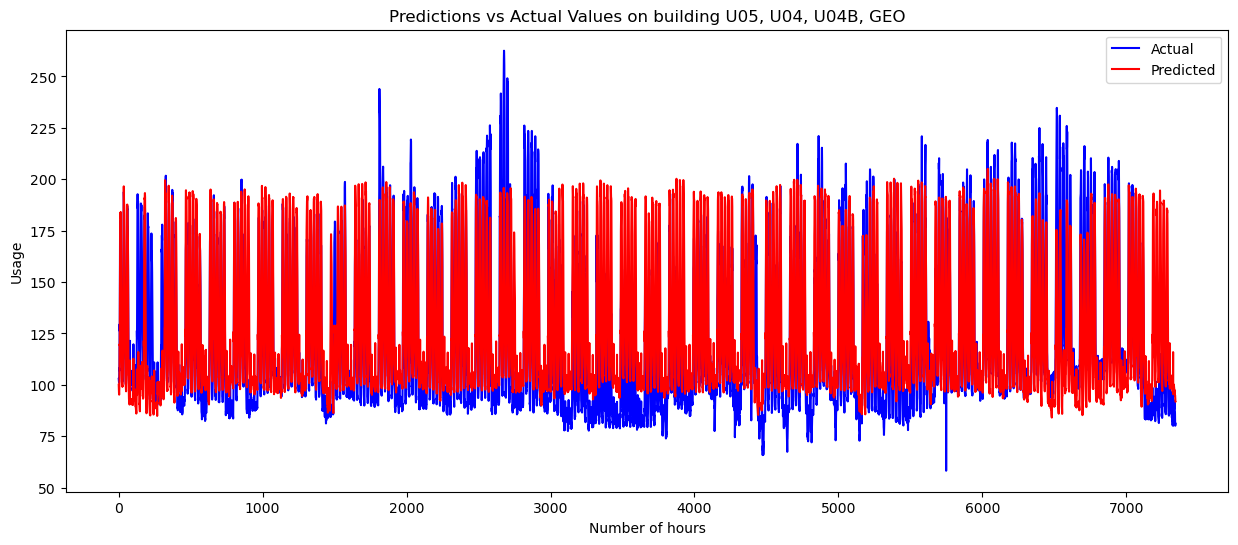

Process building 5/10: TEG
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:2.49114
[1000]	validation_0-rmse:0.02651
[2000]	validation_0-rmse:0.00481
[2642]	validation_0-rmse:0.00481
MSE: 53.09
MAE: 5.55
R² Score: -13.34
MAPE: 215831973439971104.00%


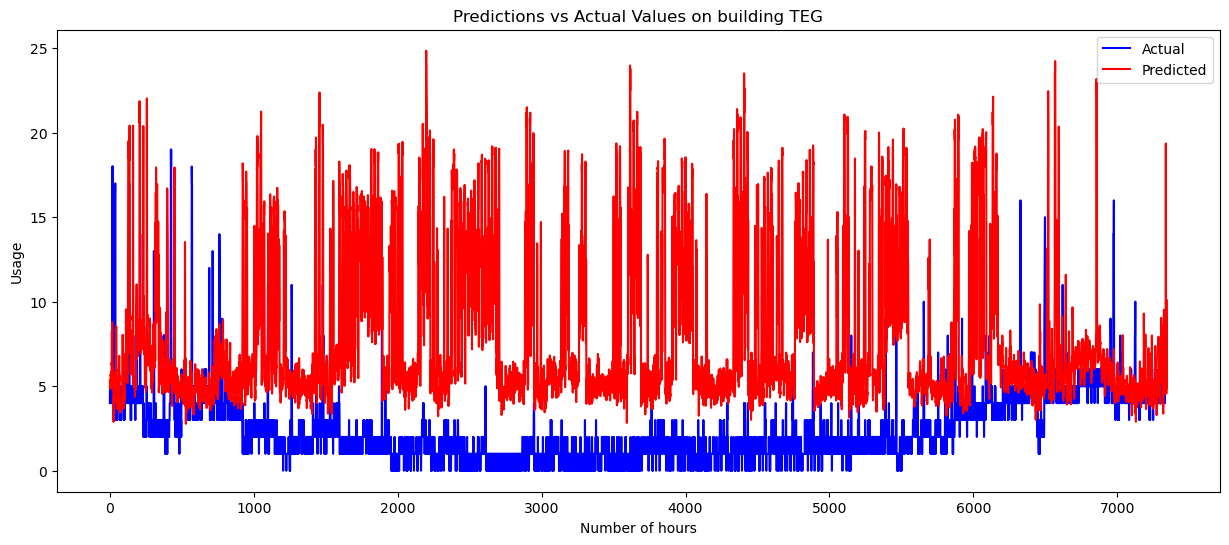

Process building 6/10: LIB
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:41.50067
[1000]	validation_0-rmse:0.03562
[2000]	validation_0-rmse:0.00394
[2643]	validation_0-rmse:0.00394
MSE: 635.24
MAE: 16.64
R² Score: 0.76
MAPE: 23.95%


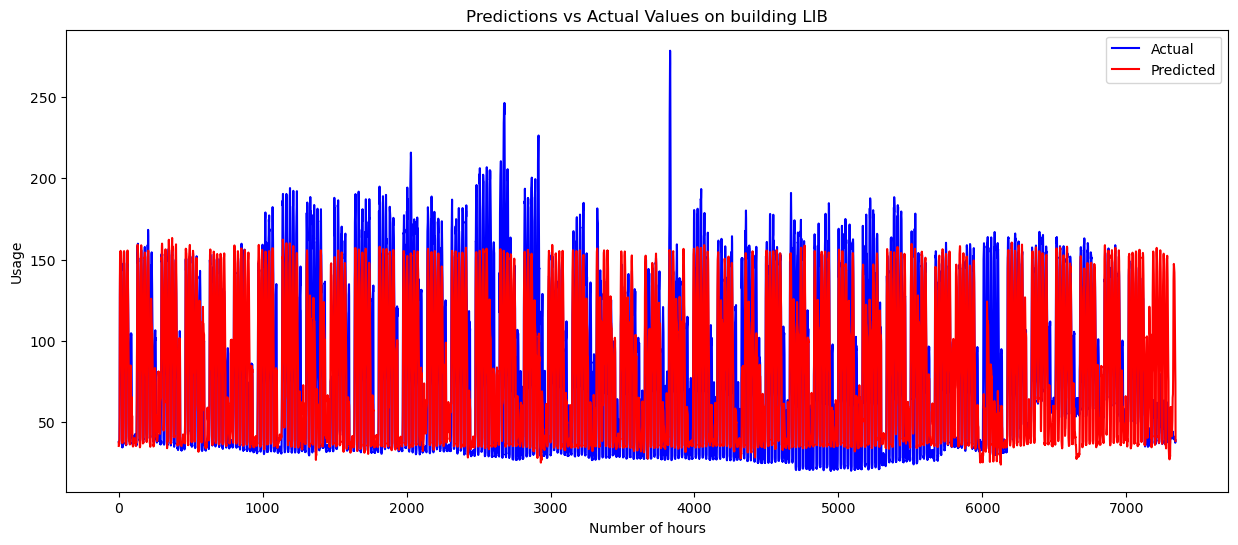

Process building 7/10: MEK
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:8.00738
[1000]	validation_0-rmse:0.01561
[2000]	validation_0-rmse:0.00373
[2395]	validation_0-rmse:0.00373
MSE: 44.72
MAE: 4.98
R² Score: 0.24
MAPE: 7574315769731095.00%


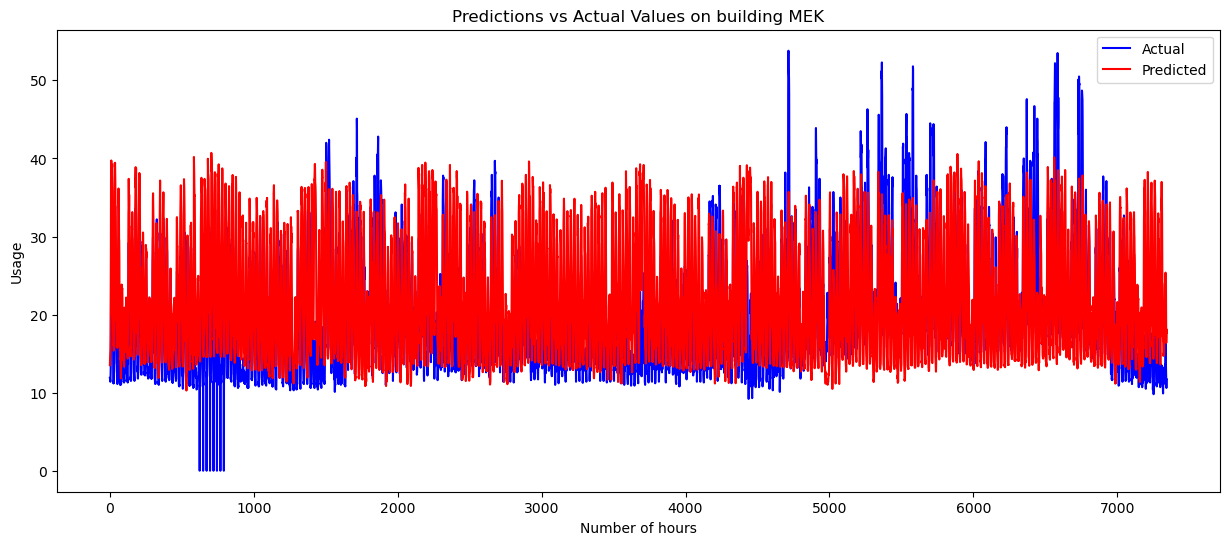

Process building 8/10: SOC
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:43.68039
[1000]	validation_0-rmse:0.06506
[2000]	validation_0-rmse:0.00390
[2754]	validation_0-rmse:0.00390
MSE: 1665.69
MAE: 30.27
R² Score: 0.25
MAPE: 33.82%


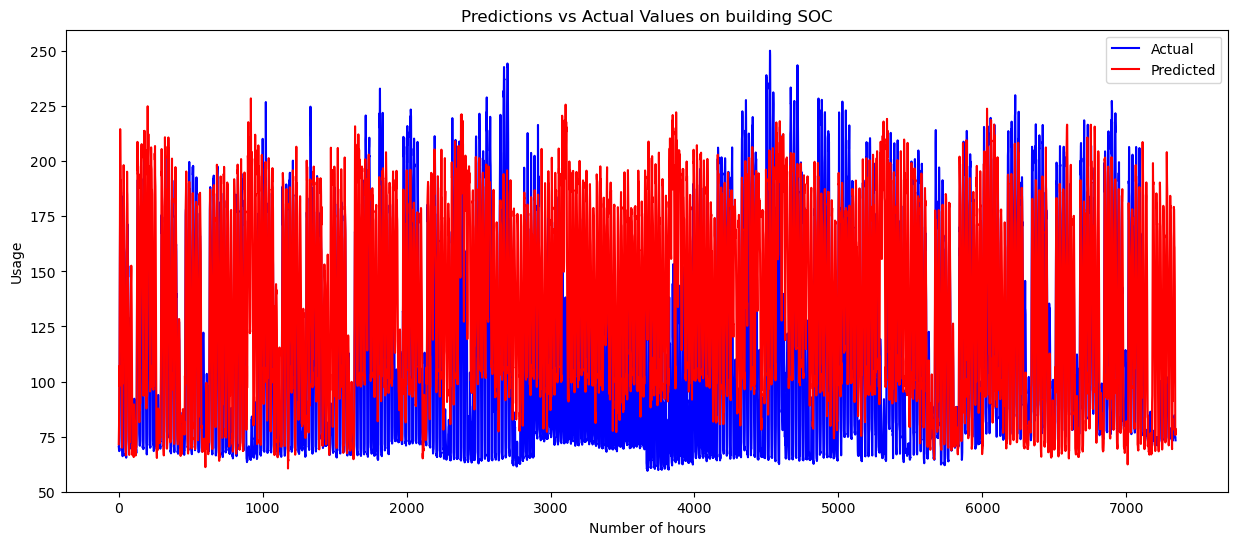

Process building 9/10: S01
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:13.19319
[1000]	validation_0-rmse:0.02589
[2000]	validation_0-rmse:0.00410
[2541]	validation_0-rmse:0.00410
MSE: 198.82
MAE: 11.36
R² Score: -0.15
MAPE: 277.91%


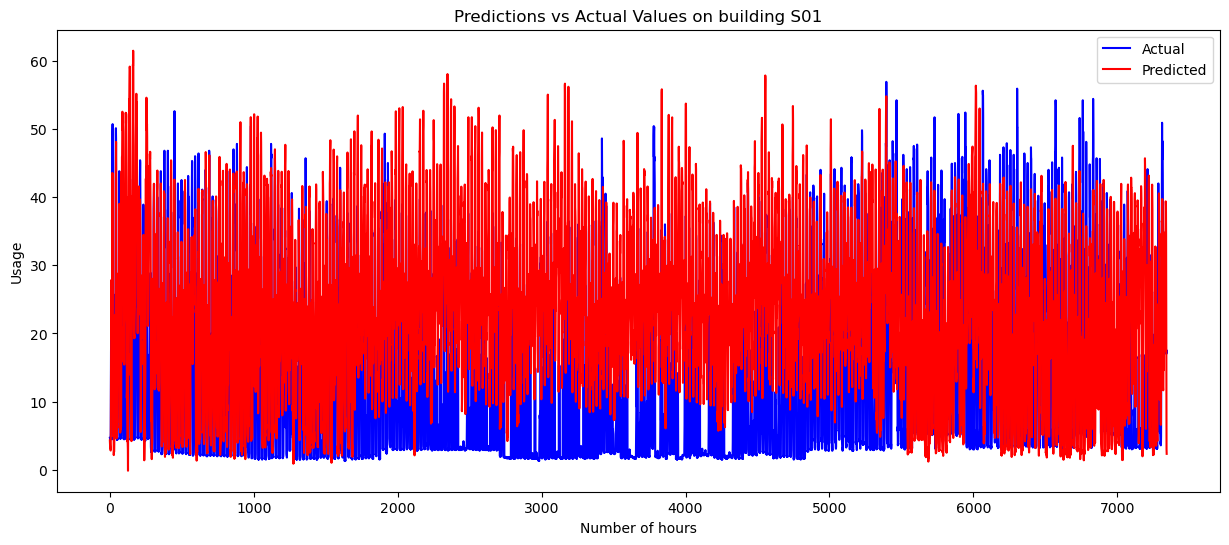

Process building 10/10: D04
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
[0]	validation_0-rmse:5.08406
[1000]	validation_0-rmse:0.01448
[2000]	validation_0-rmse:0.00339
[2357]	validation_0-rmse:0.00339
MSE: 42.97
MAE: 5.32
R² Score: -0.25
MAPE: 61.01%


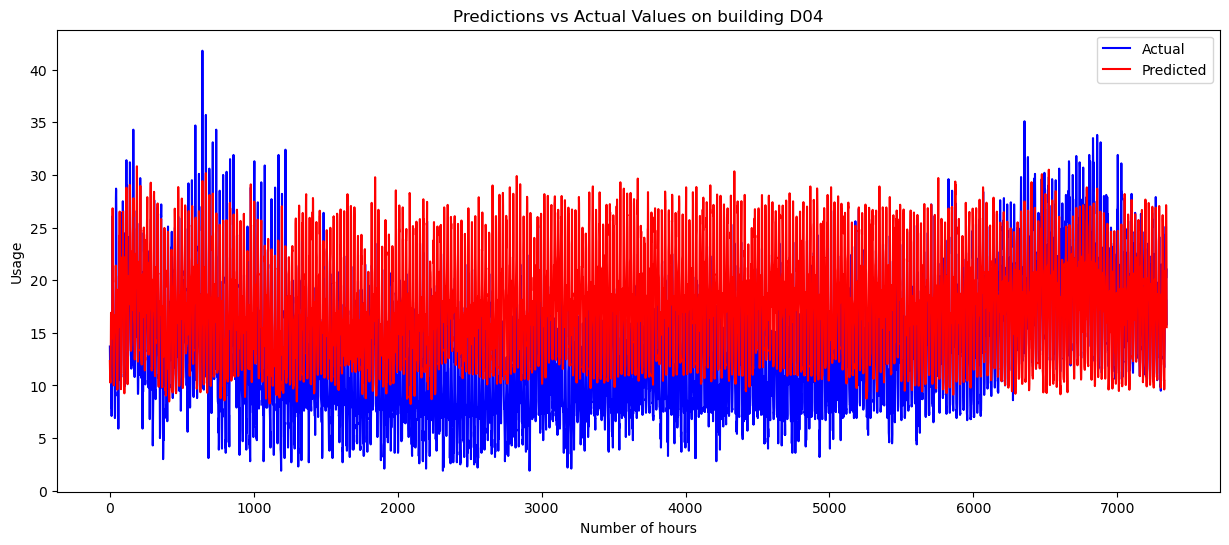

In [14]:
for building_idx in range(len(building_names)):

    building = building_names[building_idx]
    print(f"Process building {building_idx+1}/{len(building_names)}: {building}")
    
    idx_start = building_idx * 8760
    idx_end = (building_idx + 1) * 8760
    X_building = X.iloc[idx_start:idx_end, :].copy()
    y_building = y.iloc[idx_start:idx_end].copy()

    train_index = list(range(0, 1416))
    validation_index = list(range(1416, len(X_building)))

    X_train, X_validation = X_building.iloc[train_index], X_building.iloc[validation_index]
    y_train, y_validation = y_building.iloc[train_index], y_building.iloc[validation_index]
    print(f"Train shape: {X_train.shape}, Validation shape: {X_validation.shape}")
    print(f"Train shape: {y_train.shape}, Validation shape: {y_validation.shape}")

    # Initialize the model
    model = xgb.XGBRegressor(
            n_estimators=5000,
            early_stopping_rounds=1000,
            objective='reg:squarederror',
            eval_metric=['rmse'],
            learning_rate=0.1,
            reg_alpha=0,
            reg_lambda=0.1,
            min_child_weight=0,
            max_depth=6,
            subsample=1,
            colsample_bytree=1,
            random_state=2025
        )
        
    # Train model on training data
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train)],
        verbose=1000
    )

    # Initialize predictions array
    y_pred = np.zeros(len(X_validation))

    # Step 1: Predict the first value using last known real usage
    current_features = X_validation.iloc[0].copy()
    y_pred[0] = model.predict(current_features.values.reshape(1, -1))[0]

    # Step 2 onwards: Predict recursively using previous prediction
    for i in range(1, len(X_validation)):
        current_features = X_validation.iloc[i].copy()
        current_features['Usage_lag_1'] = y_pred[i - 1]
        y_pred[i] = model.predict(current_features.values.reshape(1, -1))[0]


    # Evaluate the model
    mse = mean_squared_error(y_validation, y_pred)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)
    mape = mean_absolute_percentage_error(y_validation, y_pred) * 100

    with open(PATH, 'a') as text_file:
        text_file.write(f'{building}: {mape}\n')

    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Plotting the predictions vs actual values
    plt.figure(figsize=(15, 6))
    plt.plot(y_validation.values, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red')
    plt.title(f'Predictions vs Actual Values on building {building}')
    plt.xlabel('Number of hours')
    plt.ylabel('Usage')
    plt.legend()
    plt.show()